# Data Driven Energy Management Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline


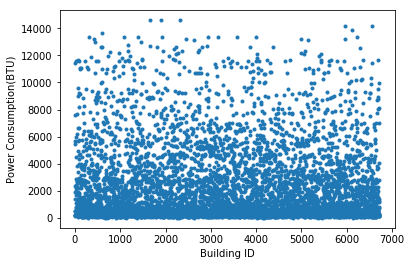

In [16]:
Data = pd.read_csv('2012_public_use_data_aug2016.csv')
Data['FREESTN'] = Data['FREESTN'].fillna(0)

clean = Data.fillna(Data.median())
energy_consumption = clean[['MFBTU','ELBTU','NGBTU','FKBTU','DHBTU']]
clean['total'] = (energy_consumption.sum(axis = 1))/clean['SQFT']
plt.scatter(range(len(clean['total'])),clean['total'],marker = '.')
plt.xlabel('Building ID')
plt.ylabel('Power Consumption(BTU)')
plt.show()
energy_records_attributes = ['MFBTU','MFEXP','ELCNS','ELBTU','ELEXP','NGCNS','NGBTU','NGEXP','FKCNS','FKBTU','FKEXP',
                             'DHCNS','DHBTU','DHEXP','MFHTBTU','MFCLBTU','MFVNBTU','MFWTBTU','MFLTBTU','MFCKBTU',
                             'MFRFBTU','MFOFBTU','MFPCBTU','MFOTBTU','ELHTBTU','ELCLBTU','ELVNBTU','ELWTBTU','ELLTBTU',
                             'ELCKBTU','ELRFBTU','ELOFBTU','ELPCBTU','ELOTBTU','NGHTBTU','NGCLBTU','NGWTBTU','NGCKBTU',
                             'NGOTBTU','FKHTBTU','FKCLBTU','FKWTBTU','FKCKBTU','FKOTBTU','DHHTBTU','DHCLBTU','DHWTBTU',
                             'DHCKBTU','DHOTBTU',]

clean = clean.drop(energy_records_attributes,axis = 1)
clean = clean.drop('PUBID',axis = 1)
clean = clean.drop('SQFT', axis = 1)


In [3]:
PC = {}
PC['Vacant'] = clean[clean['PBA']==1]['total']
PC['Office'] = (clean[clean['PBA']==2]['total']).drop([4])
PC['Laboratory'] = clean[clean['PBA']==4]['total']
PC['Nonrefrigerated warehouse'] = (clean[clean['PBA']==5]['total']).drop([24])
PC['Food sales'] = clean[clean['PBA']==6]['total']
PC['Public order and safety'] = clean[clean['PBA']==7]['total']
PC['Outpatient health care'] = clean[clean['PBA']==8]['total']
PC['Refrigerated warehouse'] = (clean[clean['PBA']==11]['total']).drop([207])
PC['Religious worship'] = clean[clean['PBA']==12]['total']
PC['Public assembly'] = clean[clean['PBA']==13]['total']
PC['Education'] = clean[clean['PBA']==14]['total']
PC['Food service'] = clean[clean['PBA']==15]['total']
PC['Inpatient health care'] = clean[clean['PBA']==16]['total']
PC['Nursing'] = clean[clean['PBA']==17]['total']
PC['Lodging'] = clean[clean['PBA']==18]['total']
PC['Strip shopping mall'] = clean[clean['PBA']==23]['total']
PC['Enclosed mall'] = clean[clean['PBA']==24]['total']
PC['Retail other than mall'] = clean[clean['PBA']==25]['total']
PC['Service'] = (clean[clean['PBA']==26]['total']).drop([0])
PC['Other'] = clean[clean['PBA']==91]['total']

office_Example_power = clean[clean['PBA']==2]['total'][:1]
service_Example_power = clean[clean['PBA']==26]['total'][:1]
nonrefrigerated_warehouse_Example_power = clean[clean['PBA']==5]['total'][:1]
refrigerated_warehouse_Example_power = clean[clean['PBA']==11]['total'][:1]


In [4]:
clean = clean.drop('total',axis = 1)

BPA = {}
BPA['Vacant'] = clean[clean['PBA']==1]
BPA['Office'] = clean[clean['PBA']==2].drop([4])
BPA['Laboratory'] = clean[clean['PBA']==4]
BPA['Nonrefrigerated warehouse'] = clean[clean['PBA']==5].drop([24])
BPA['Food sales'] = clean[clean['PBA']==6]
BPA['Public order and safety'] = clean[clean['PBA']==7]
BPA['Outpatient health care'] = clean[clean['PBA']==8]
BPA['Refrigerated warehouse'] = clean[clean['PBA']==11].drop(clean.index[207])
BPA['Religious worship'] = clean[clean['PBA']==12]
BPA['Public assembly'] = clean[clean['PBA']==13]
BPA['Education'] = clean[clean['PBA']==14]
BPA['Food service'] = clean[clean['PBA']==15]
BPA['Inpatient health care'] = clean[clean['PBA']==16]
BPA['Nursing'] = clean[clean['PBA']==17]
BPA['Lodging'] = clean[clean['PBA']==18]
BPA['Strip shopping mall'] = clean[clean['PBA']==23]
BPA['Enclosed mall'] = clean[clean['PBA']==24]
BPA['Retail other than mall'] = clean[clean['PBA']==25]
BPA['Service'] = clean[clean['PBA']==26].drop([0])
BPA['Other'] = clean[clean['PBA']==91]

office_Example = clean[clean['PBA']==2][:1]
service_Example = clean[clean['PBA']==26][:1]
nonrefrigerated_warehouse_Example = clean[clean['PBA']==5][:1]
refrigerated_warehouse_Example = clean[clean['PBA']==11][:1]


In [5]:
def set_model(clean_data, power):

    A = np.matrix(clean_data)
    
    y=np.matrix(power).T
    x = np.linalg.pinv(np.dot(A.T,A)).dot(A.T).dot(y)
    y_predict = np.dot(A,x)
    EER = np.array(y/y_predict)
    EER_plot = np.sort(EER[:,0])
    arange = np.arange(0,len(EER_plot))/len(EER_plot)
    
    return [EER_plot,arange,x]

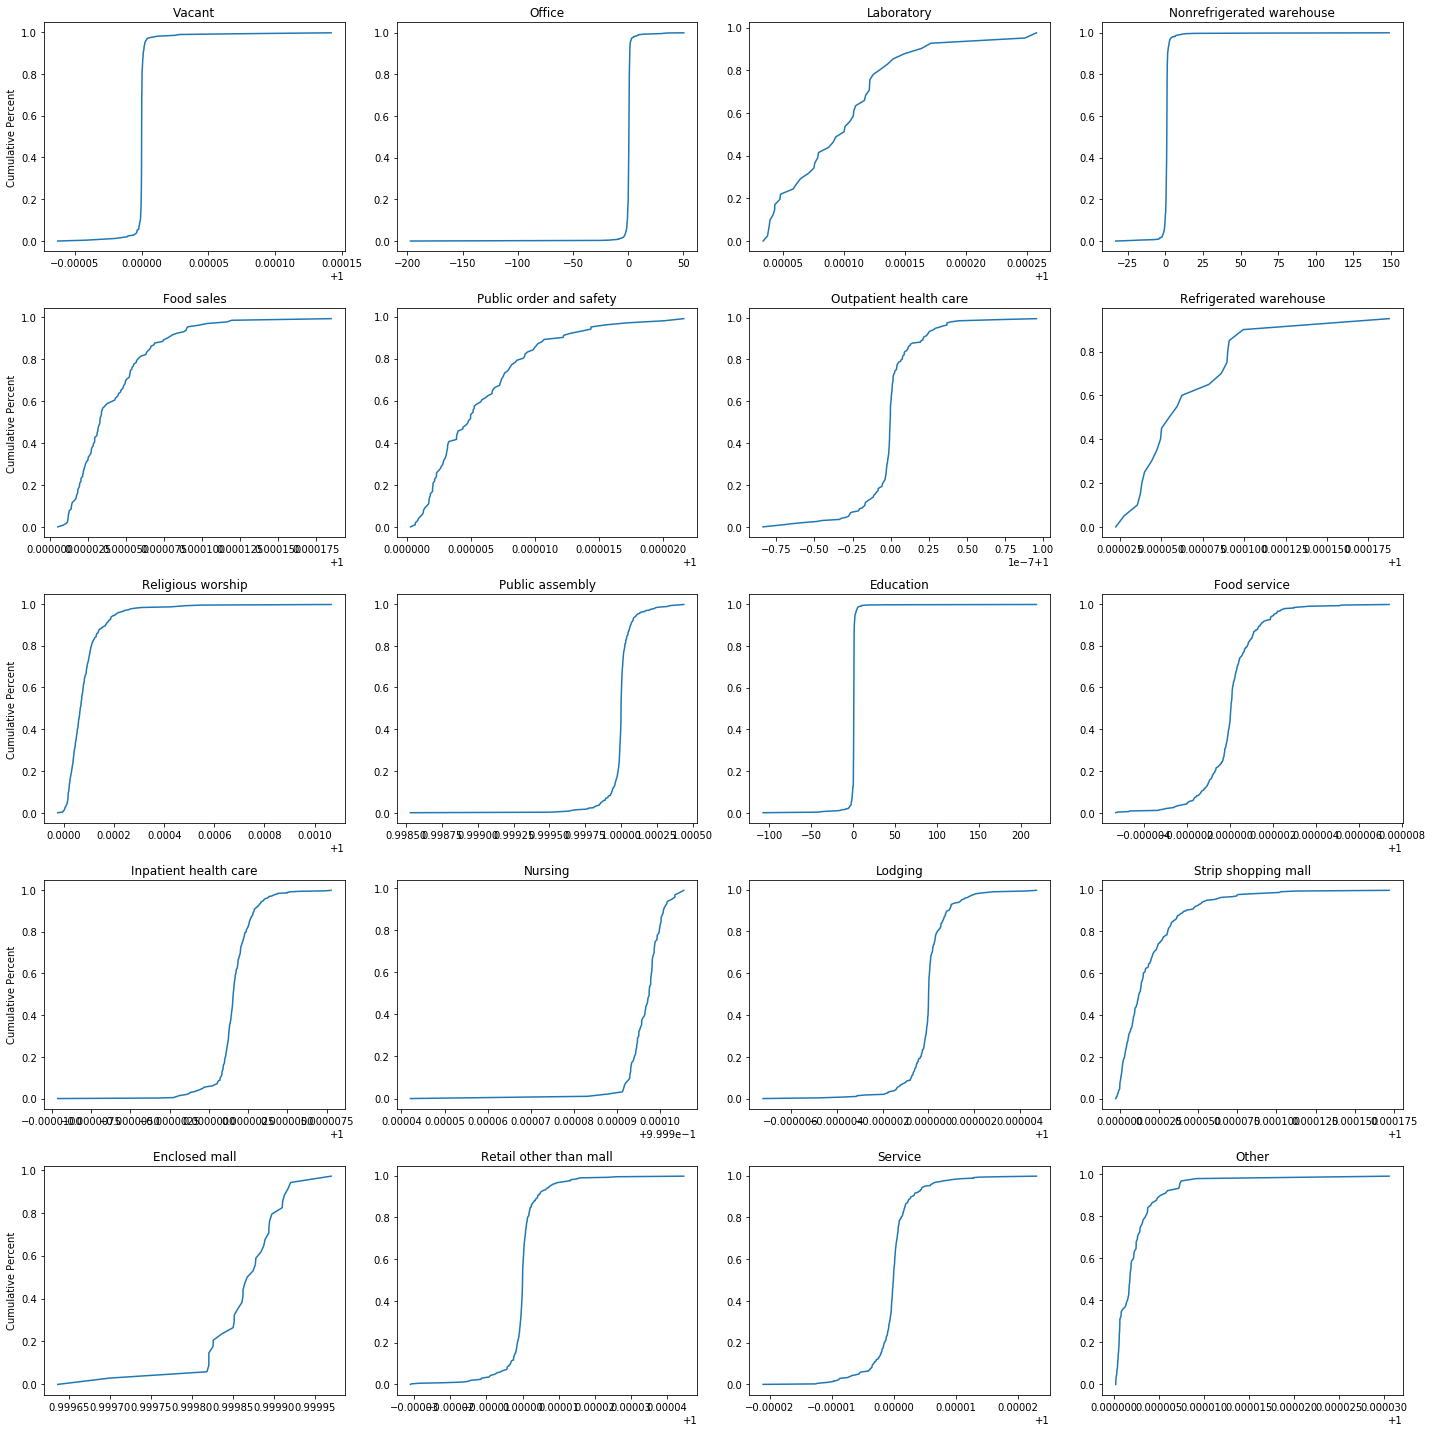

In [6]:
BPA_plot = {}
for key in BPA:
    BPA_plot[key] = set_model(BPA[key],PC[key])
    
fig = plt.figure(figsize=(20,20))

for i in BPA_plot.keys():
    plt.subplot(5,4,list(BPA_plot.keys()).index(i)+1)
    plt.plot(BPA_plot[i][0],BPA_plot[i][1])
    plt.title(i)
    if (list(BPA_plot.keys()).index(i)+1)%4 ==1:
        plt.ylabel('Cumulative Percent')
    if (list(BPA_plot.keys()).index(i)+1)%4 >16:
        plt.xlabel('Efficiency Ratio')
fig.tight_layout()
plt.show()
fig.savefig('modelpic.png')

In [7]:
x_office = set_model(BPA['Office'],PC['Office'])[2]
x_service = set_model(BPA['Service'],PC['Service'])[2]
x_nonrefrigerated_warehouse = set_model(BPA['Nonrefrigerated warehouse'],PC['Nonrefrigerated warehouse'])[2]
x_refrigerated_warehouse = set_model(BPA['Refrigerated warehouse'],PC['Refrigerated warehouse'])[2]

In [8]:
y_office_predict = np.dot(office_Example,x_office)
y_service_predict = np.dot(service_Example,x_service)
y_nonrefrigerated_warehouse_predicted = np.dot(nonrefrigerated_warehouse_Example,x_nonrefrigerated_warehouse)
y_refrigerated_warehouse_predicted = np.dot(refrigerated_warehouse_Example,x_refrigerated_warehouse)


EER_office = float(office_Example_power) /float(y_office_predict)
EER_service = float(service_Example_power)/float(y_service_predict)
EER_nonrefrigerated_warehouse = float(nonrefrigerated_warehouse_Example_power)/float(y_nonrefrigerated_warehouse_predicted)
EER_refrigerated_warehouse = float(refrigerated_warehouse_Example_power)/float(y_refrigerated_warehouse_predicted)

print(EER_office)
print(EER_service)
print(EER_nonrefrigerated_warehouse)
print(EER_refrigerated_warehouse)

0.016051408645622024
1.8238526416905287
0.666141270996464
0.8494072600242298


In [11]:
def peer_conparing(name, eer):
    list1 = BPA_plot[name][0]
    list2 = np.sort(np.append(list1 , eer))
    p = (((np.where(list2 == eer)[0][0])+1)/len(list2))
    return p

In [12]:
a = peer_conparing('Office',EER_office)
b = peer_conparing('Service',EER_service)
c = peer_conparing('Nonrefrigerated warehouse',EER_nonrefrigerated_warehouse)
d = peer_conparing('Refrigerated warehouse',EER_refrigerated_warehouse)
print(a)
print(b)
print(c)
print(d)


0.182890855457
1.0
0.349593495935
0.047619047619
